In [29]:
import os,glob,zipfile
from Code import HBV_pso
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

from ipywidgets import FileUpload


In [22]:
files = glob.glob("./file_uploads/*")
for f in files:
    os.remove(f)
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [27]:
file = "./file_uploads/input.zip"

# try:
with open(file, "w+b") as i:
    i.write(upload.data[0])

# with zipfile.ZipFile(file, 'r') as zip_ref:
#     zip_ref.extractall("./file_uploads")
# file = glob.glob1("./uploaded_data",'*.'+'csv' )
# print(" {} is uploaded successfully".format(file[0]))
# # except:
#     print("Uploaded data could not found, please upload shape files")

### Model Selection 

In [28]:
w = widgets.Dropdown(
    options=['NAM', 'HBV', 'GR4J'],
    value='NAM',
    description='Model:',
    disabled=False,
)

display(w)

Dropdown(description='Model:', options=('NAM', 'HBV', 'GR4J'), value='NAM')

In [46]:
from bokeh.plotting import figure, ColumnDataSource, output_file, save
from bokeh.models import Span, CrosshairTool, HoverTool, ResetTool, PanTool, WheelZoomTool, BoxZoomTool,SaveTool,FixedTicker,DaysTicker, FuncTickFormatter
from bokeh.io import output_notebook, show
from bokeh.models import DataRange1d,DatetimeTickFormatter
from bokeh.palettes import Dark2_5 as palette
output_notebook()


Loading BokehJS ...

In [37]:
df = pd.read_csv('./Data/Alihoca.csv', sep=',',parse_dates=[0], header=0)
df = df.set_index('Date')
df.head()

,Temp,Q,P,E
Date,,,,
2016-10-09,11.695,0.176,0.0,2.79
2016-10-10,10.695,0.176,0.0,3.46
2016-10-11,11.195,0.176,0.0,3.65
2016-10-12,12.395,0.214,0.0,3.46
2016-10-13,16.395,0.214,0.0,5.64


In [62]:
df.head()

,Temp,Q,P,E
Date,,,,
2016-10-09,11.695,0.176,0.0,2.79
2016-10-10,10.695,0.176,0.0,3.46
2016-10-11,11.195,0.176,0.0,3.65
2016-10-12,12.395,0.214,0.0,3.46
2016-10-13,16.395,0.214,0.0,5.64


In [81]:
import itertools
import datetime
colors = itertools.cycle(palette) 
source = ColumnDataSource(df)
p = figure(plot_width=900, plot_height=600)

p.line(x='Date', y='Temp',source=source,line_color="red", line_width=2,legend_label='_filled',alpha = 0.8)
p.line(x='Date', y='E',source=source,line_color="#3288bd", line_width=2,legend_label='_filled',alpha = 0.8)
p.x_range = DataRange1d(start=datetime.datetime(int(2017), 10, 1, 0, 0, 0), end=datetime.datetime(int(2018), 10, 1, 0, 0, 0))
p.xaxis.major_label_orientation = 1.0
# p.xaxis.ticker.desired_num_ticks = 12
p.xaxis.formatter=DatetimeTickFormatter(days="%d-%m-%Y",
months="%d-%m-%Y",
years="%d-%m-%Y"
)
# p.line(x='Date', y='Q',source=source,line_color="red",line_width=2,legend_label='_filled',alpha = 0.8)

show(p)


In [3]:
if w.value == 'HBV':
    params = np.array([1.06653896e+00, 7.85803777e-01, 1.12456396e+00, 4.00000005e-02
        , 6.52779758e+01, 1.40000000e+00, 2.04563613e-01, 5.00000000e-01
        , 7.23806920e-03, 6.20000000e-04, 5.98308241e-01, 2.29012429e+00
        , 2.32816764e-02, 4.01249854e-01, 0.00000000e+00, 1.25000000e-01
        , 1.19040117e+00, 1.40000000e+00, 6.15462361e+00])
    States = np.array([0, 0, 0.9 * params[1], 0, 0, 0, 0, 0.1])


No constraints given.
New best for swarm at iteration 1: [1.34886204e+00 1.23700184e+00 1.00000000e-03 2.56518029e-01
 3.97367189e+02 6.00000000e-01 1.41415970e+00 3.51919650e-01
 1.67000000e-02 1.05968824e-04 9.01964478e-01 2.33365618e+00
 1.01651258e-02 9.88575959e-01 4.18755402e-02 4.78699361e-02
 1.30349157e+00 1.28754829e+00 1.00000000e+00] 1.4094916275546785
New best for swarm at iteration 1: [1.56394630e-01 3.00000000e+00 7.53543460e-01 1.56340805e-01
 1.95817977e+02 6.00000000e-01 1.45012827e+00 4.03795414e-01
 8.17351534e-03 4.09394799e-04 7.35958969e-01 1.00000000e+00
 3.98179257e-02 9.45818840e-01 1.35868305e-02 8.14709429e-02
 1.40000000e+00 1.06420605e+00 4.83118465e+00] 1.2899755833881432
Best after iteration 1: [1.56394630e-01 3.00000000e+00 7.53543460e-01 1.56340805e-01
 1.95817977e+02 6.00000000e-01 1.45012827e+00 4.03795414e-01
 8.17351534e-03 4.09394799e-04 7.35958969e-01 1.00000000e+00
 3.98179257e-02 9.45818840e-01 1.35868305e-02 8.14709429e-02
 1.40000000e+00 1.06

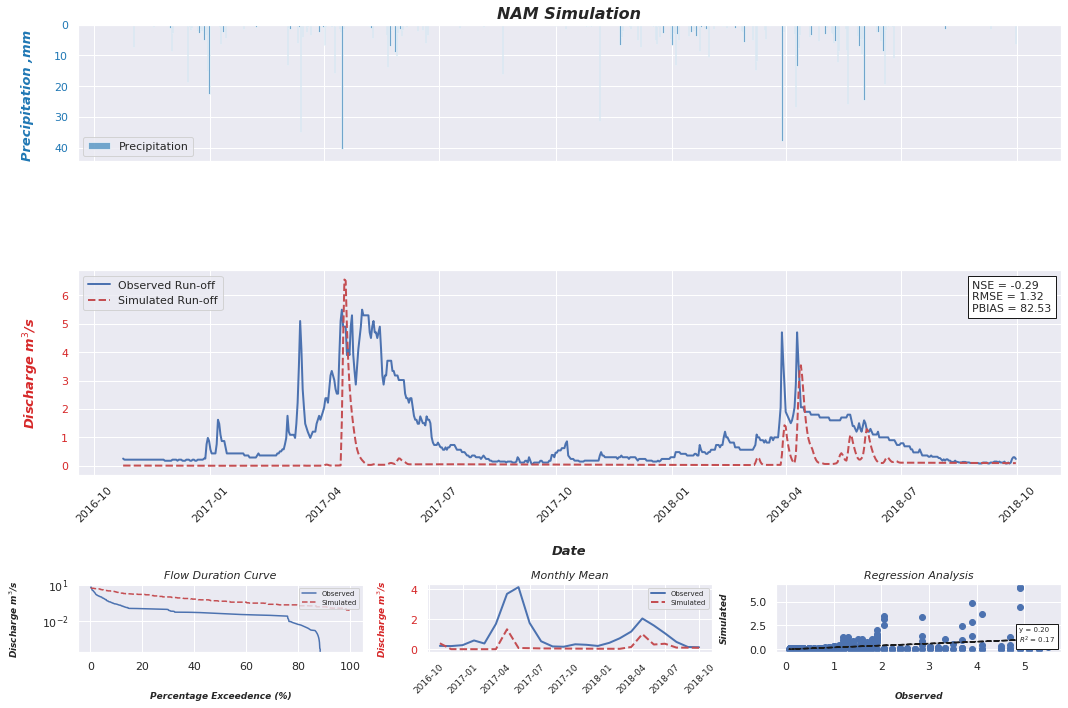

In [18]:

n = HBV_pso.Hbv(97.5, params, States, calibration=True, method='PSO', Objective_fun='nse', maxiter=2)
n.process_path = './Data'
n.Data_file = os.path.join(n.process_path, "Alihoca.csv")
n.run()
n.draw()

In [5]:
import numpy as np
import pandas as pd
from ipysheet import from_dataframe
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
sheet = from_dataframe(df)
display(sheet)
df

Sheet(cells=(Cell(choice=[], column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, type='nu…

,A,B,C,D
2013-01-01,0.190949,-0.657911,0.889051,0.366719
2013-01-02,-0.733492,-0.928849,-0.011853,-1.352720
2013-01-03,1.662029,0.942904,1.533530,-0.020184
2013-01-04,0.015002,-0.684162,-0.253527,0.189231
2013-01-05,0.084912,-0.628783,0.758202,-0.197238
2013-01-06,-1.736636,0.964702,0.472235,0.660066


In [58]:
import pandas as pd
from ipysheet import from_dataframe
from ipywidgets import Text, VBox, link

par = ['ltt','utt','ttm','cfmax [mm c^-1 h^-1]','fc','ecorr','etf','lp','k [h^-1] upper zone','k1 lower zone','alpha','beta','cwh','cfr','c_flux','perc mm/h','rfcf','sfcf','Maxbas']

df = pd.DataFrame({'Parameter': par,
                   'Value': params })



s = from_dataframe(df)

s

Sheet(cells=(Cell(choice=[], column_end=0, column_start=0, numeric_format=None, row_end=18, row_start=0, squee…

In [60]:
cell1 = cell(1, 1)

In [75]:
s.cells[1]

Cell(choice=[], column_end=1, column_start=1, row_end=18, row_start=0, squeeze_row=False, type='numeric', valu…

In [58]:
import ipywidgets as widgets

tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab